## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import os

## Import Dataset

In [2]:
dataset_file = '../Data/Acc/Data1/T0_ID00000000_Walk_0.csv' 
dataset_id = os.path.basename(dataset_file).split('_')[1]
dataset = pd.read_csv(dataset_file, skiprows = 2, names=['Ax','Ay','Az'])
N = dataset['Ax'].size 

### Visual data

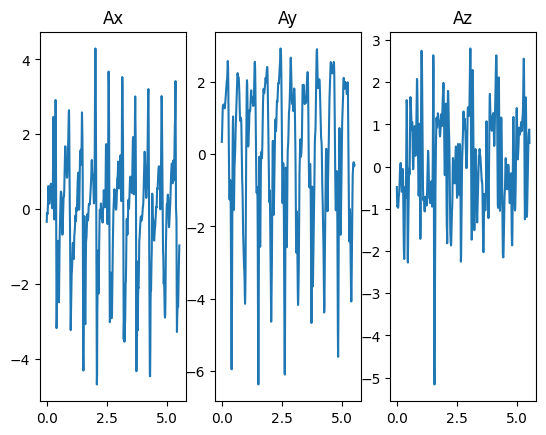

In [3]:
fig, ax = plt.subplots(nrows=1,
                       ncols=3,) 
t_step = 0.01
t = np.arange(0,(N-0.5)*t_step, t_step)

## Ax
Ax_y = dataset['Ax']
ax[0].set(title="Ax")
ax[0].plot(t, Ax_y)

## Ay
Ay_y = dataset['Ay']
ax[1].set(title="Ay")
ax[1].plot(t, Ay_y)

## Az
Az_y = dataset['Az']
ax[2].set(title="Az")
ax[2].plot(t, Az_y)



#### Fourier Tranform 

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Vị trí của phần tử gần 50: [138]


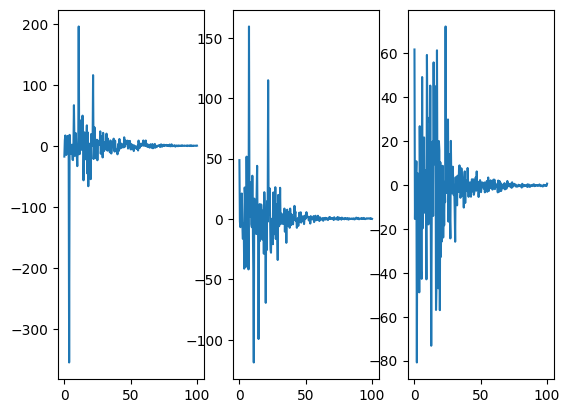

In [4]:
fig, ax = plt.subplots(nrows=1,
                       ncols=3,)

## Ax
Ax = np.fft.fft(Ax_y)
Ax_plot = Ax[0:int(t.size/2+1)]
t_plot = np.linspace(0, 100, Ax_plot.size)
ax[0].plot(t_plot, Ax_plot);

## Ay
Ay = np.fft.fft(Ay_y)
Ay_plot = Ay[0:int(t.size/2+1)]
t_plot = np.linspace(0, 100, Ay_plot.size)
ax[1].plot(t_plot, Ay_plot);

## Az
Az = np.fft.fft(Az_y)
Az_plot = Az[0:int(t.size/2+1)]
t_plot = np.linspace(0, 100, Az_plot.size)
ax[2].plot(t_plot, Az_plot);

frequency = 50  # Tần số cần tìm

# Tìm vị trí của phần tử trong mảng t_plot có giá trị bằng frequency
indices = np.where(t_plot == frequency)[0]

if len(indices) == 0:
    # Tìm vị trí của phần tử gần nhất với hoặc bằng frequency trong mảng t_plot
    closest_index = np.argmin(np.abs(t_plot - frequency))
    indices = np.append(indices, closest_index)  # Thêm closest_index vào indices
    print("Vị trí của phần tử gần 50:", indices)

else:
    # In ra vị trí của các phần tử có tần số bằng frequency
    print("Vị trí của phần tử có tần số 50:", indices)



#### Clear noise

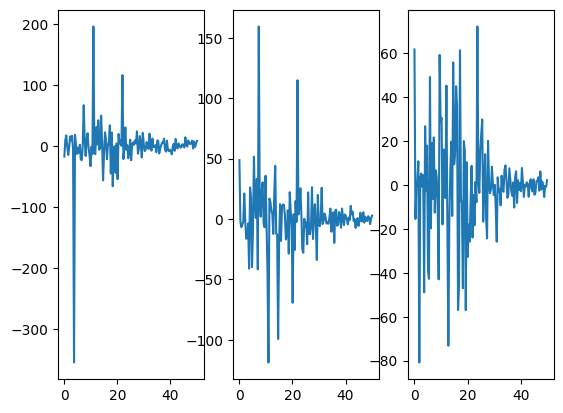

In [5]:
fig, ax = plt.subplots(nrows=1,
                       ncols=3,)
# Thiết kế bộ lọc thông thấp
cutoff_frequency = indices[0]  # Tần số cắt (cutoff frequency)

# Áp dụng bộ lọc
filtered_Ax = Ax_plot[0:cutoff_frequency]
filtered_Ay = Ay_plot[0:cutoff_frequency]
filtered_Az = Az_plot[0:cutoff_frequency]

t_plot2 = np.linspace(0, 50, filtered_Ax.size)

# Vẽ biểu đồ tín hiệu đã lọc
ax[0].plot(t_plot2, filtered_Ax)
ax[1].plot(t_plot2, filtered_Ay)
ax[2].plot(t_plot2, filtered_Az)

### Output Data